In [1]:
import netCDF4 as nc
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import tqdm
from eofs.standard import Eof
from cartopy.mpl.ticker import LongitudeFormatter,LatitudeFormatter
def cftime2pdtime(cf):
    # nc文件读取配套处理函数
    return pd.to_datetime(datetime.datetime(cf.year,cf.month,cf.day,cf.hour))

mpl.rcParams['font.sans-serif'] = ['LXGW Bright']
# 字体下载 https://github.com/lxgw/LxgwBright
mpl.rcParams['axes.unicode_minus'] = False


In [2]:
# 数据读取
Hdsst=nc.Dataset(r'.\HadISST_sst.nc\HadISST_sst.nc')
Hdsst.variables.keys()
time=pd.to_datetime(list(map(cftime2pdtime,nc.num2date(np.array(Hdsst['time']),Hdsst['time'].units))))
sst1=np.array(Hdsst.variables['sst'])[(time.year>=1900)&(time.year<=2020),:,:]
lat=np.array(Hdsst['latitude'])
lon=np.array(Hdsst['longitude'])
# 数据处理
sst1[sst1<-999]=np.nan
time=time[(time.year>=1900)&(time.year<=2020)]
Lon,Lat=np.meshgrid(lon,lat)
# 数据切割 & 拼接
lonind1=lon>120
lonind2=lon<-100
latind=(lat>=0)&(lat<=65)
sst=np.concatenate([sst1[:,latind,:][:,:,lonind1],sst1[:,latind,:][:,:,lonind2]],axis=2)
Lon,Lat=np.meshgrid(np.concatenate([lon[lonind1],lon[lonind2]+360],axis=0),lat[latind])


Text(0.5, 1.0, 'SST 1900-01-16 12:00:00')

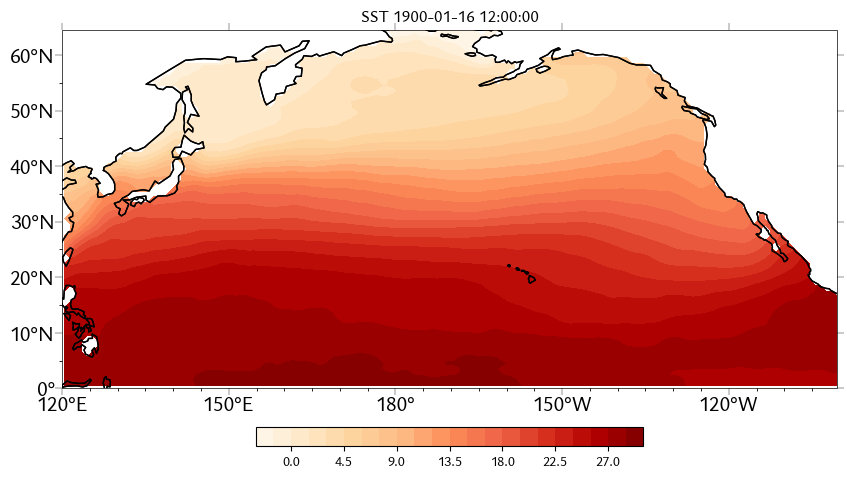

In [3]:
fig=plt.figure(figsize=[10,10])
ax=plt.axes(facecolor='white', projection=ccrs.PlateCarree(central_longitude=180))
c=ax.contourf(Lon,Lat,sst[0,:,:],20,transform=ccrs.PlateCarree(central_longitude=0),cmap='OrRd')
ax.coastlines() 
ax.xaxis.set_major_formatter(LongitudeFormatter())#刻度格式转换为经纬度样式 
ax.yaxis.set_major_formatter(LatitudeFormatter())
ax.xaxis.set_minor_locator(mticker.MultipleLocator(5))#刻度格式转换为经纬度样式 
ax.yaxis.set_minor_locator(mticker.MultipleLocator(5))
ax.tick_params(axis='both',which='major',labelsize=15,direction='out',length=5,width=0.3,pad=0.2,top=True,right=True)
ax.coastlines() 
ax.spines['geo'].set_linewidth(0.5)#调节边框粗细
ax.set_xticks(np.arange(-60,81,30))
ax.set_yticks(np.arange(0,61,10))
plt.colorbar(c,orientation="horizontal",extend='both',shrink=0.5,pad=0.05)
ax.set_title(f'SST {time[0]}')

In [4]:
anotime=time
def ano_core(dat):
    global anotime
    #print(int(dat.shape[0]/12))
    ans=np.zeros(shape=dat.shape)
    mon12=np.array([np.nanmean(dat[anotime.month==i]) for i in range(1,13)])
    for i in range(dat.shape[0]):
        #print(i-int(i/12)*12)
        ans[i]=dat[i]-mon12[i-int(i/12)*12]
    return ans
def ano_list_map(dat):
    ans=np.array(list(map(ano_core,dat)))
    return ans
def Ano_Allinone(dat):
    a=np.swapaxes(dat,0,1)
    a=np.swapaxes(a,1,2)
    ans=np.array(list(map(ano_list_map,a)))
    ans=np.swapaxes(ans,1,2)
    ans=np.swapaxes(ans,0,1)
    return ans
ssta=Ano_Allinone(sst)

C:\Users\XUEX\AppData\Local\Temp\ipykernel_36880\1699685120.py:6: RuntimeWarning: Mean of empty slice
  mon12=np.array([np.nanmean(dat[anotime.month==i]) for i in range(1,13)])


Text(0.5, 1.0, 'SSTA 1900-01-16 12:00:00')

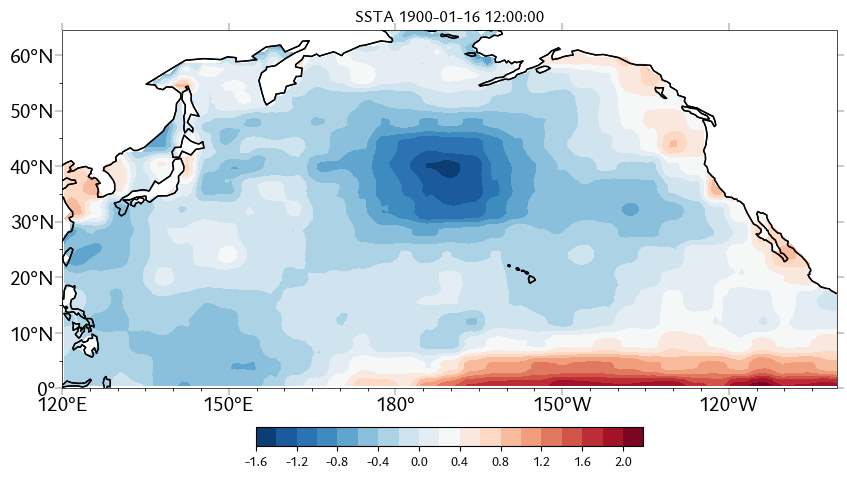

In [5]:
fig=plt.figure(figsize=[10,10])
ax=plt.axes(facecolor='white', projection=ccrs.PlateCarree(central_longitude=180))
c=ax.contourf(Lon,Lat,ssta[0,:,:],20,transform=ccrs.PlateCarree(central_longitude=0),cmap='RdBu_r')
ax.coastlines() 
ax.xaxis.set_major_formatter(LongitudeFormatter())#刻度格式转换为经纬度样式 
ax.yaxis.set_major_formatter(LatitudeFormatter())
ax.xaxis.set_minor_locator(mticker.MultipleLocator(5))#刻度格式转换为经纬度样式 
ax.yaxis.set_minor_locator(mticker.MultipleLocator(5))
ax.tick_params(axis='both',which='major',labelsize=15,direction='out',length=5,width=0.3,pad=0.2,top=True,right=True)
ax.coastlines() 
ax.spines['geo'].set_linewidth(0.5)#调节边框粗细
ax.set_xticks(np.arange(-60,81,30))
ax.set_yticks(np.arange(0,61,10))
plt.colorbar(c,orientation="horizontal",extend='both',shrink=0.5,pad=0.05)
ax.set_title(f'SSTA {time[0]}')

In [6]:
solver = Eof(ssta)
eofs = solver.eofs(neofs=12)
pcs = solver.pcs(npcs=12, pcscaling=0)

In [7]:
dir(solver)

['_L',
 '_P',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_center',
 '_centered',
 '_data',
 '_ddof',
 '_filled',
 '_flatE',
 '_originalshape',
 '_records',
 '_valid_nan',
 '_verify_projection_shape',
 '_weights',
 'eigenvalues',
 'eofs',
 'eofsAsCorrelation',
 'eofsAsCovariance',
 'getWeights',
 'neofs',
 'northTest',
 'pcs',
 'projectField',
 'reconstructedField',
 'totalAnomalyVariance',
 'varianceFraction']

In [8]:
solver.totalAnomalyVariance()

2601.6923951936656

In [9]:
solver.eigenvalues()

array([6.28775373e+02, 5.14608007e+02, 2.12577789e+02, ...,
       5.32840209e-10, 5.13627578e-10, 6.15572822e-31])

In [10]:
weights = solver.eigenvalues(12) / np.sum(solver.eigenvalues())
summ = np.cumsum(weights)
print ('        方差贡献率|累计方差贡献率：')
for i in range(len(weights)):
    print (f'EOF{i+1:2d}:   {weights[i]:.3f}  |    {summ[i]:.3f}')

        方差贡献率|累计方差贡献率：
EOF 1:   0.242  |    0.242
EOF 2:   0.198  |    0.439
EOF 3:   0.082  |    0.521
EOF 4:   0.066  |    0.588
EOF 5:   0.047  |    0.634
EOF 6:   0.036  |    0.670
EOF 7:   0.029  |    0.699
EOF 8:   0.027  |    0.726
EOF 9:   0.025  |    0.752
EOF10:   0.023  |    0.774
EOF11:   0.015  |    0.789
EOF12:   0.015  |    0.804


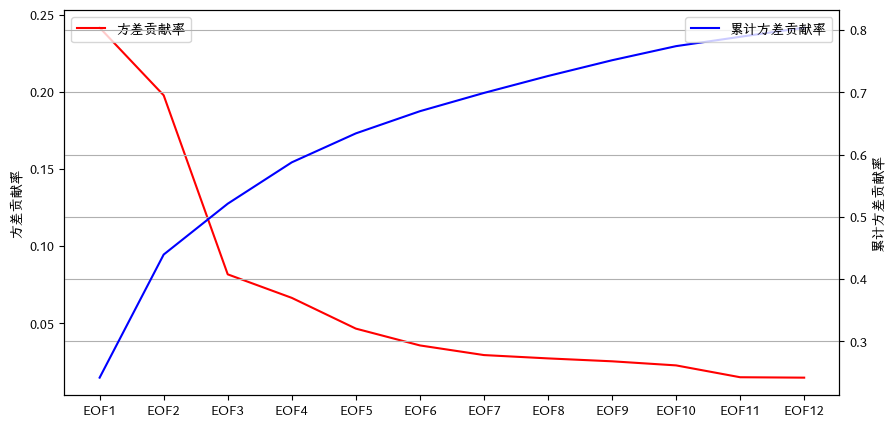

In [11]:


fig=plt.figure(figsize=[10,5])
ax1 = fig.add_subplot(1,1,1)
# 设置为共用X轴的双y轴图表
ax2 = ax1.twinx()
ax1.plot([f'EOF{i+1}' for i in range(12)],weights,label='方差贡献率',c='r')
ax1.set_ylabel('方差贡献率')
ax2.plot([f'EOF{i+1}' for i in range(12)],summ,label='累计方差贡献率',c='b')
ax2.set_ylabel('累计方差贡献率')
ax1.legend(loc=2)
ax2.legend(loc=1)
plt.grid()

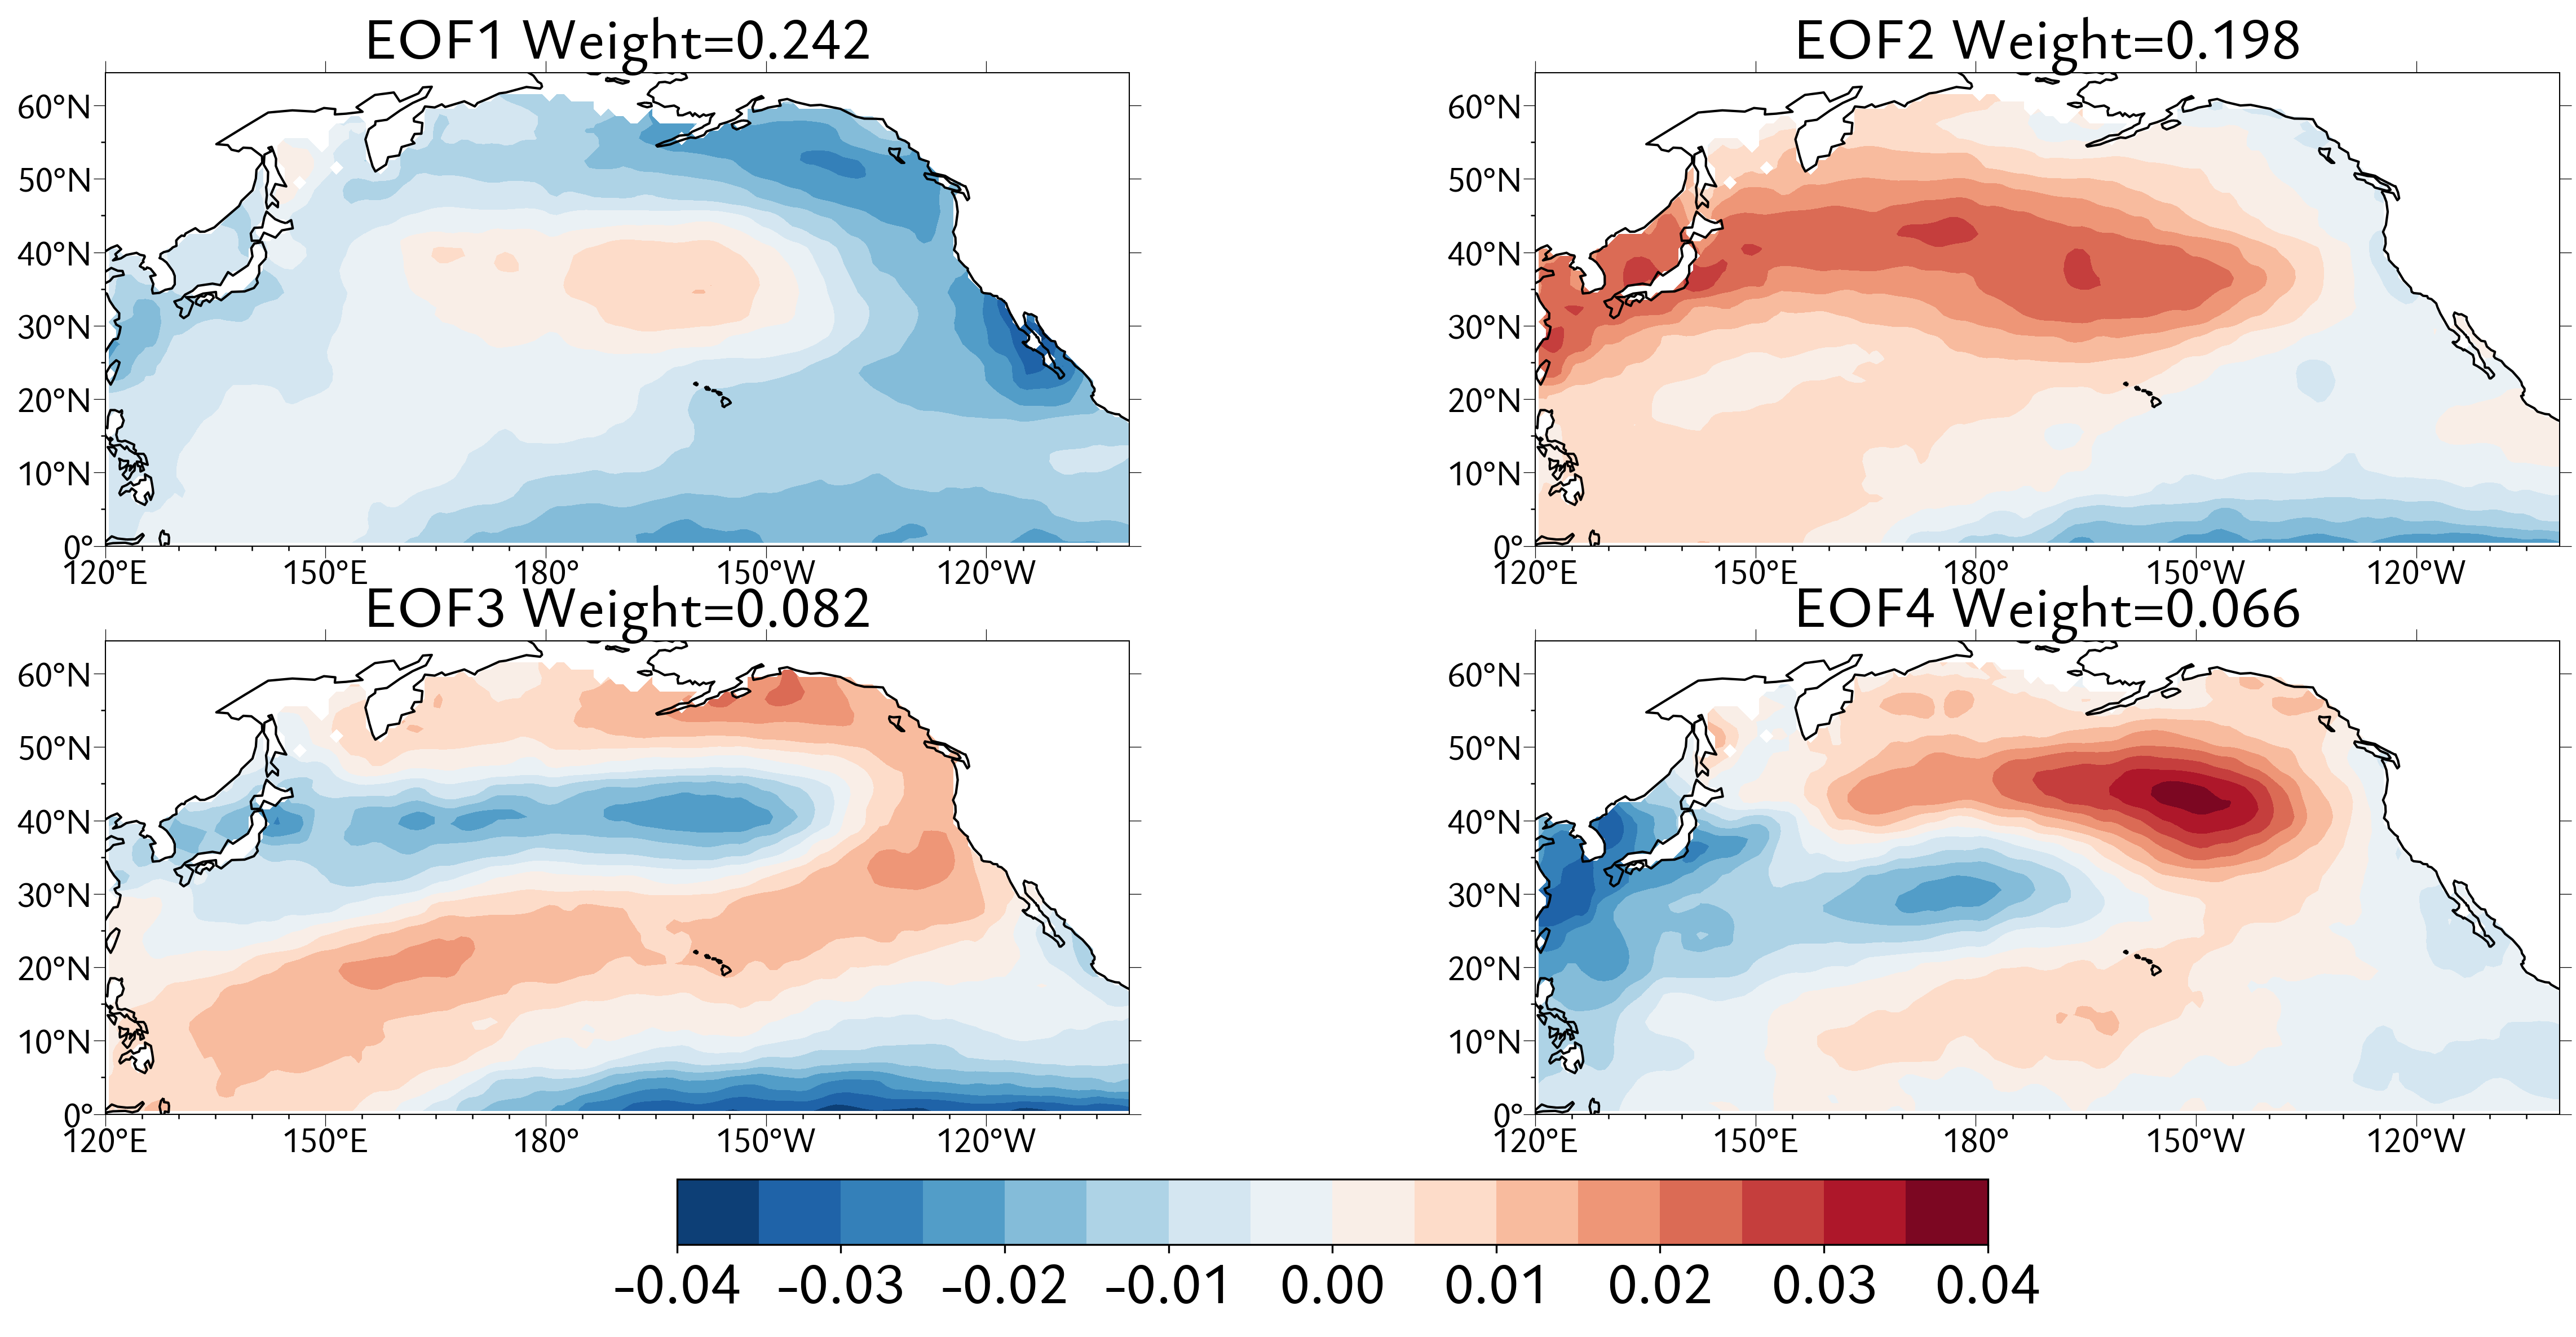

In [12]:
fig, axs = plt.subplots(2,2 , figsize=(20,10),dpi=300,subplot_kw=dict(facecolor='white', projection=ccrs.PlateCarree(central_longitude=180)))
axs=axs.flatten()

for i in range (4):
    ax=axs[i]
    ax.set_title(f"EOF{i+1} Weight={weights[i]:.3f}",size=25)
    c=ax.contourf(Lon,Lat,eofs[i,:,:],cmap='RdBu_r',levels=np.arange(-0.04,0.045,0.005),transform=ccrs.PlateCarree(central_longitude=0))#
    ax.contourf(Lon,Lat,eofs[i,:,:],colors=['#0d3f76'],levels=[-1,-0.04],transform=ccrs.PlateCarree(central_longitude=0))
    ax.contourf(Lon,Lat,eofs[i,:,:],colors=['#7c0722'],levels=[0.04,1],transform=ccrs.PlateCarree(central_longitude=0))
    ax.xaxis.set_major_formatter(LongitudeFormatter())#刻度格式转换为经纬度样式 
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    ax.xaxis.set_minor_locator(mticker.MultipleLocator(5))#刻度格式转换为经纬度样式 
    ax.yaxis.set_minor_locator(mticker.MultipleLocator(5))
    ax.tick_params(axis='both',which='major',labelsize=15,direction='out',length=5,width=0.3,pad=0.2,top=True,right=True)
    ax.coastlines() 
    ax.spines['geo'].set_linewidth(0.5)#调节边框粗细
    ax.set_xticks(np.arange(-60,81,30))
    ax.set_yticks(np.arange(0,61,10))
cb=plt.colorbar(c, ax=[axs[i] for i in range(4)],orientation="horizontal",extend='both',shrink=0.5,pad=0.05) #extend是让colorbar两端带尖的设置
cb.ax.tick_params(labelsize=25) 
plt.savefig('results.png')

(-25551.5, 18612.5)

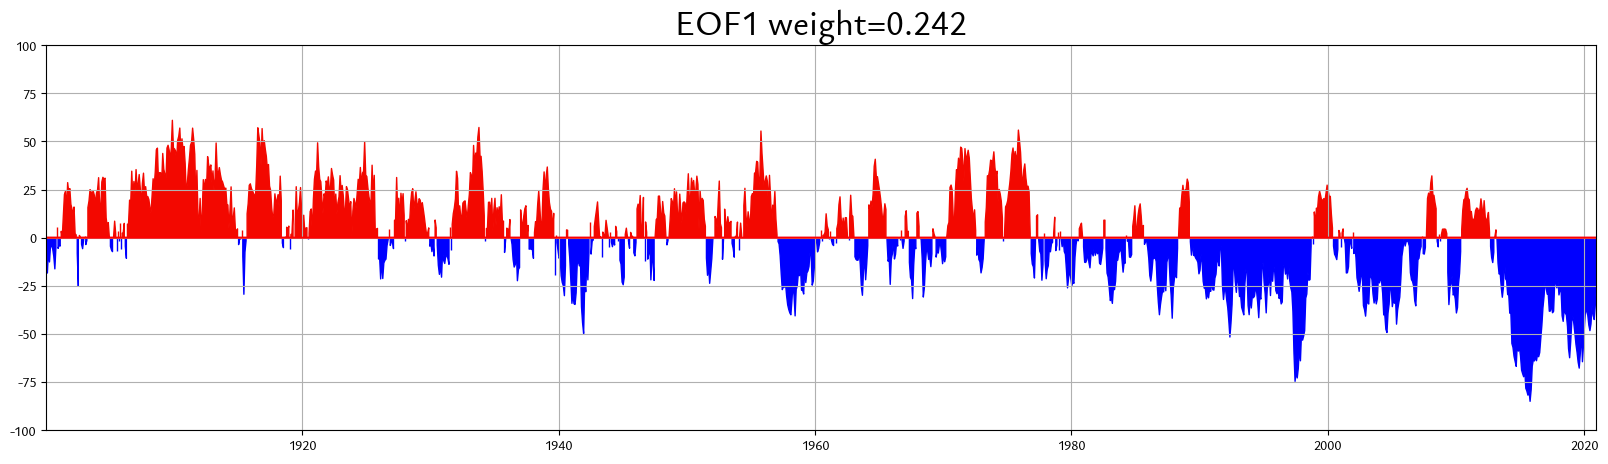

In [13]:
i=0
plt.figure(figsize=[20,5])
plt.title(f"EOF{i+1} weight={weights[i]:.3f}",size=25)
#plt.plot(time,pcs[:,i],c='k')
plt.plot(time,np.array([0]*time.shape[0]),'r')
plt.grid()
plt.fill_between(time,0,pcs[:,i],where=pcs[:,i]-0>0,color='#f30800')
plt.fill_between(time,0,pcs[:,i],where=pcs[:,i]-0<0,color='#0000ff')
plt.ylim(-100,100)
plt.xlim(time[0],time[-1])

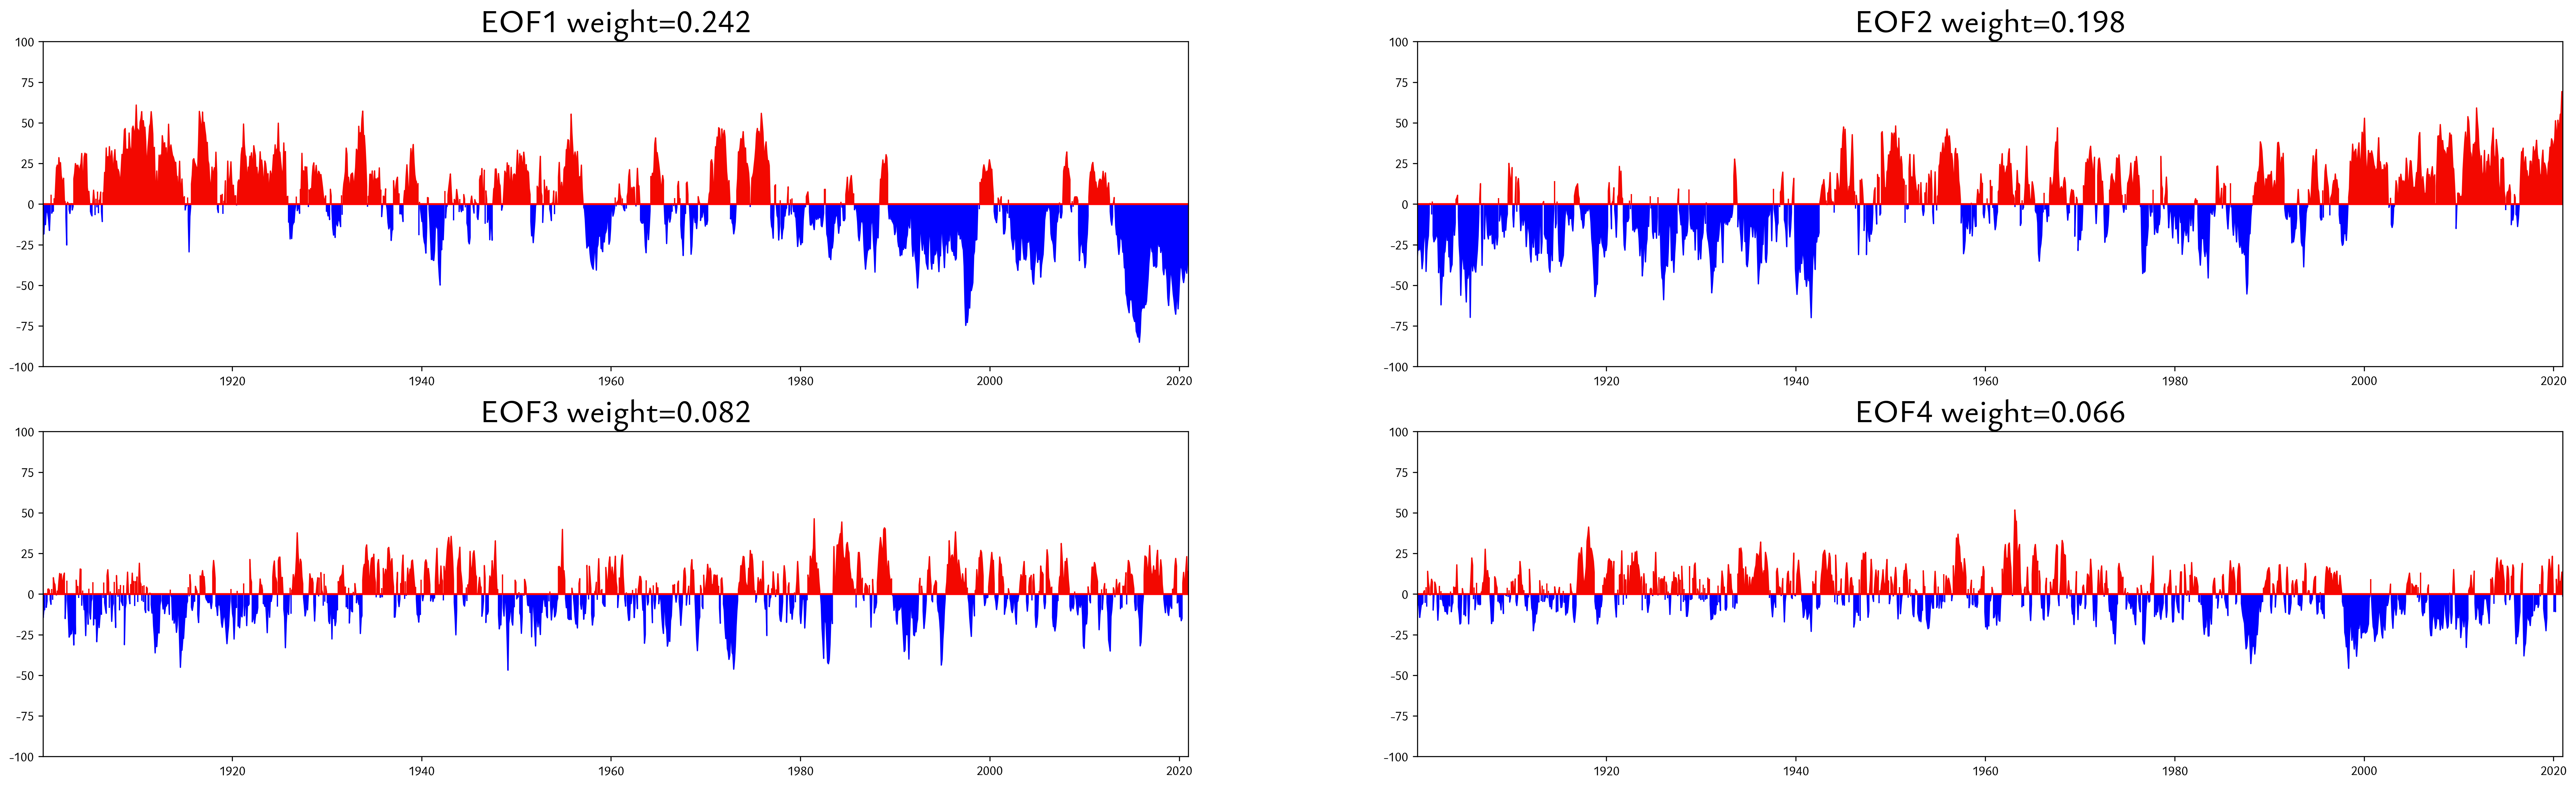

In [14]:
fig, axs = plt.subplots(2,2 , figsize=(35,10),dpi=300,subplot_kw=dict(facecolor='white'))
axs=axs.flatten()

for i in range (4):
    ax=axs[i]
    ax.set_title(f"EOF{i+1} weight={weights[i]:.3f}",size=25)
    #ax.plot(time,pcs[:,i],c='k')
    ax.plot(time,np.array([0]*time.shape[0]),'r')
    ax.fill_between(time,0,pcs[:,i],where=pcs[:,i]-0>0,color='#f30800')
    ax.fill_between(time,0,pcs[:,i],where=pcs[:,i]-0<0,color='#0000ff')
    ax.set_ylim(-100,100)
    ax.set_xlim(time[0],time[-1])


In [17]:
Pod=r"ersst.v5.pdo.dat"
Pod=pd.read_csv(Pod,header=1,sep=',')
Pod

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1854,0.11,-0.24,-0.40,-0.44,-0.54,-0.30,-0.10,-1.24,-1.00,-2.23,-1.68,-1.76
1,1855,-0.20,-0.39,-0.24,-0.58,-1.34,-1.88,-1.13,-0.48,-0.76,-0.63,-0.41,-0.88
2,1856,-0.39,0.47,0.42,-0.96,-1.26,-2.15,-0.69,0.63,0.58,0.59,0.23,0.04
3,1857,-0.52,-1.67,-1.05,-0.81,-0.65,1.03,1.17,0.81,0.84,0.70,0.38,-0.55
4,1858,-0.96,-1.53,-1.76,-0.82,0.49,2.19,1.05,0.67,1.38,2.35,0.46,-1.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,2019,-0.34,-0.72,-0.39,0.10,0.26,-0.05,0.54,0.01,0.13,-0.90,-0.49,0.00
166,2020,-1.41,-1.48,-1.75,-1.32,-0.53,-0.76,-0.92,-1.33,-1.04,-0.62,-1.59,-0.99
167,2021,-0.61,-1.10,-1.68,-1.85,-2.01,-1.81,-1.96,-0.94,-1.96,-3.11,-2.75,-2.71
168,2022,-2.40,-1.91,-1.67,-2.10,-2.25,-1.34,-2.62,-2.38,-2.29,-1.80,-2.41,-2.21


Text(0.5, 1.0, 'PDO Index')

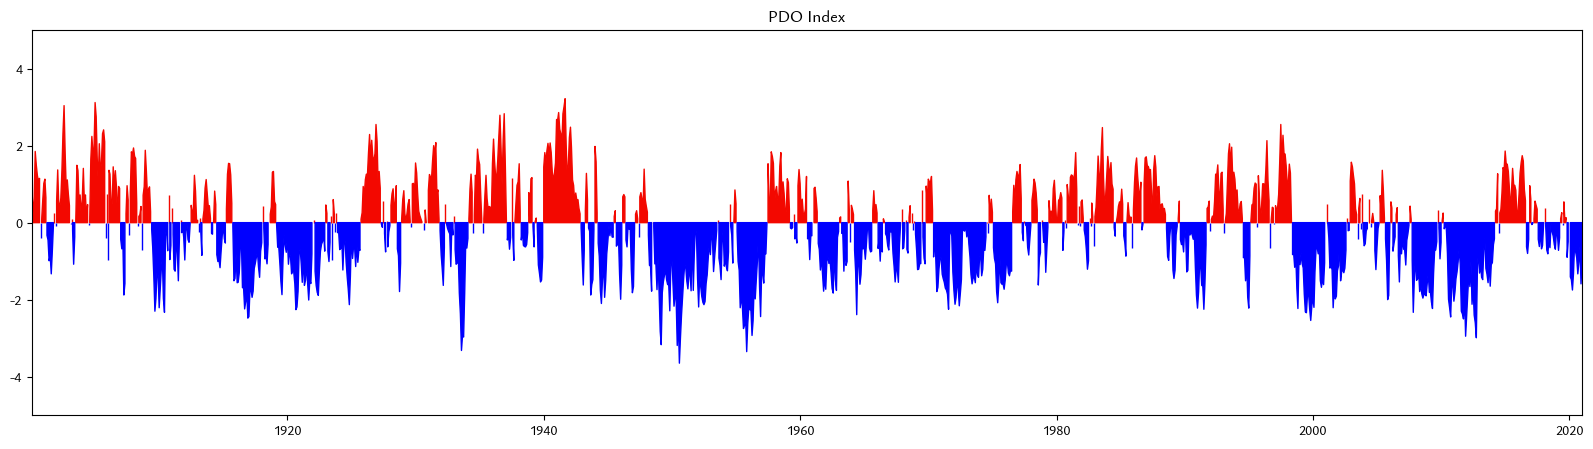

In [ ]:
plt.figure(figsize=[20,5])
dat=np.array(Pod)[:,1:].flatten()
t=pd.date_range('1854-01-01','2023-12-31',freq='1M')
dat[dat>20]=np.nan
#plt.plot(t[(t.year>=1900)&(t.year<=2020)],dat[(t.year>=1900)&(t.year<=2020)])
#plt.plot(t,solver.eigenvalues())
dat=dat[(t.year>=1900)&(t.year<=2020)]
t=t[(t.year>=1900)&(t.year<=2020)]
plt.fill_between(t,0,dat,where=dat-0>0,color='#f30800')
plt.fill_between(t,0,dat,where=dat-0<0,color='#0000ff')
plt.xlim(t[0],t[-1])
plt.ylim(-5,5)
plt.title('PDO Index')